In [ ]:
from datasets import load_dataset

In [ ]:
eval_dataset = load_dataset("json", data_files="gemini_ds.json")["train"]

In [ ]:
from langchain_community.llms import Ollama
from ragas.llms import LangchainLLMWrapper
from ragas.embeddings import LangchainEmbeddingsWrapper
from langchain_huggingface import HuggingFaceEmbeddings
from ragas.evaluation import evaluate
from ragas.metrics import faithfulness, answer_relevancy, context_precision, context_recall
from datasets import Dataset

# ⚙️ Instancia el modelo Ollama
ollama_llm = Ollama(model="llama3.1:8b", timeout=60)  # Puedes usar otro como mistral, llama2, etc.

# ⚙️ Wrappers
llm = LangchainLLMWrapper(ollama_llm)

embed_model = LangchainEmbeddingsWrapper(
    HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
)

# ⚙️ Asigna modelos a las métricas
faithfulness.llm = llm
faithfulness.embeddings = embed_model

answer_relevancy.llm = llm
answer_relevancy.embeddings = embed_model

context_precision.llm = llm
context_precision.embeddings = embed_model

context_recall.llm = llm
context_recall.embeddings = embed_model

In [ ]:
results = evaluate(
    eval_dataset,  # tu Dataset ya limpio con 'question', 'contexts', 'answer' y 'ground_truth'
    metrics=[faithfulness, answer_relevancy, context_precision],
    batch_size=1
)

In [ ]:
groq_dataset = load_dataset("json", data_files="groq_ds.json")["train"]

In [42]:
# ⚠️ Usa batch_size pequeño
results2 = evaluate(
    groq_dataset,  # tu Dataset ya limpio con 'question', 'contexts', 'answer' y 'ground_truth'
    metrics=[faithfulness, answer_relevancy, context_precision],
    batch_size=1
)

print(results2)

Batch 121/300:   0%|          | 0/1 [00:00<?, ?it/s]        Exception raised in Job[120]: OutputParserException(Invalid json output: The provided text fragments do not contain information about the number of distinct phrases used for phrase addition in adversarial attack generation. Here's how I broke down each sentence into one or more fully understandable statements:
1. Original sentence: The provided text fragments do not contain information about the number of distinct phrases used for phrase addition in adversarial attack generation.
   * Statement 1: The provided text fragments are analyzed.
   * Statement 2: The analysis does not provide information about the number of distinct phrases.
   * Statement 3: The number of distinct phrases is related to phrase addition in adversarial attack generation.
   * Statement 4: There is no information available about the number of distinct phrases used for phrase addition.
For troubleshooting, visit: https://python.langchain.com/docs/trouble

{'faithfulness': 0.5871, 'answer_relevancy': 0.3473, 'context_precision': 0.4775}


In [ ]:
qwen_ds = load_dataset("json", data_files="qwen_ds.json")["train"]

In [ ]:
results3 = evaluate(
    qwen_ds,
    metrics=[faithfulness, answer_relevancy, context_precision],
    batch_size=1
)

In [ ]:
results_df = results.to_pandas()
results_df.to_csv("gemini1.csv", index=False)

results2_df = results2.to_pandas()
results2_df.to_csv("groq1.csv", index=False)

results3_df = results3.to_pandas()
results3_df.to_csv("qwen1.csv", index=False)

In [ ]:
gemini_ds_2 = load_dataset("json", data_files="gemini_ds_2.json")["train"]

In [ ]:
gemini2_results  = evaluate(
    gemini_ds_2,
    metrics=[faithfulness, answer_relevancy, context_precision],
    batch_size=1
)

In [ ]:
groq_ds2 = load_dataset("json", data_files="groq_ds2.json")["train"]

In [ ]:
groq2_result  = evaluate(
    groq_ds2,
    metrics=[faithfulness, answer_relevancy, context_precision],
    batch_size=1
)

In [ ]:
qwen_ds2 = load_dataset("json", data_files="qwen_ds2.json")["train"]

In [ ]:
qwen2_result  = evaluate(
    qwen_ds2,
    metrics=[faithfulness, answer_relevancy, context_precision],
    batch_size=1
)


In [36]:
gemini2_df = gemini2_results.to_pandas()
gemini2_df.to_csv("gemini2.csv", index=False)
groq2_df = groq2_result.to_pandas()
groq2_df.to_csv("groq2.csv", index=False)
qwen2_df = qwen2_result.to_pandas()
qwen2_df.to_csv("qwen2.csv", index=False)

In [ ]:
groq_avanzado = load_dataset("json", data_files="groq_advanced_ds.json")["train"]

In [ ]:
groq_avanzado  = evaluate(
    groq_avanzado,
    metrics=[faithfulness, answer_relevancy, context_precision],
    batch_size=1
)

In [ ]:
gemini_avanzado_ds = load_dataset("json", data_files="gemini_advanced_ds.json")["train"]

In [ ]:
gemini_avanzado  = evaluate(
    gemini_avanzado_ds,
    metrics=[faithfulness, answer_relevancy, context_precision],
    batch_size=1
)

In [ ]:
qwen_avanzado_ds = load_dataset("json", data_files="qwen_advanced_ds.json")["train"]

In [ ]:
qwen_avanzado = evaluate(
    qwen_avanzado_ds,
    metrics=[faithfulness, answer_relevancy, context_precision],
    batch_size=1
)

In [37]:
geminiavanzado_df = gemini_avanzado.to_pandas()
geminiavanzado_df.to_csv("gemini_avanzado.csv", index=False)

groqavanzado_df = groq_avanzado.to_pandas()
groqavanzado_df.to_csv("groq_avanzado.csv", index=False)

qwenavanzado_df = qwen_avanzado.to_pandas()
qwenavanzado_df.to_csv("qwen_avanzado.csv", index=False)

#### Presentación de resultados

## Métricas RAGAS – Comparativa entre Configuraciones

## Primera Arquitectura

#### Configuración 1: `chunk_size=512`, `overlap=150`, `temp=0.1`

| Modelo | Faithfulness  | Answer Relevancy  | Context Precision  |
|--------|:--------------:|:------------------:|:-------------------:|
| **Gemini 2.0 Flash** | 0.5758 | 0.4667 | 0.5831 |
| **LLaMA 3.3 70B** | 0.5005 | 0.4123 | 0.4489 |
| **Qwen 3 32B** | 0.5976 | 0.3528 | 0.4911 |

#### Configuración 2: `chunk_size=800`, `overlap=250`, `temp=0.5`

| Modelo | Faithfulness  | Answer Relevancy  | Context Precision  |
|--------|:--------------:|:------------------:|:-------------------:|
| **Gemini 2.0 Flash** | **0.6255** ⭐ | **0.2404** ⭐ | 0.4920 |
| **LLaMA 3.3 70B** | **0.5923** ⭐ | 0.4211 | **0.4805** ⭐ |
| **Qwen 3 32B** | 0.5783 | **0.4121** ⭐ | **0.4941** ⭐ |

---

### Mejores Rendimientos por Métrica:

- **Faithfulness**: Gemini 2.0 Flash (Config 2) - 0.6255
- **Answer Relevancy**: Gemini 2.0 Flash (Config 1) - 0.4667  
- **Context Precision**: Qwen 3 32B (Config 2) - 0.4941

## Métricas RAGAS – Segunda Arquitectura

| Modelo | Faithfulness  | Answer Relevancy  | Context Precision  |
|--------|:--------------:|:------------------:|:-------------------:|
| **Gemini 2.0 Flash** | 0.6557 | 0.4179 | 0.6650 |
| **LLaMA 3.3 70B (Groq)** | 0.6417 | 0.5475 | 0.5904 |
| **Qwen 3 32B** | **0.7249** ⭐ | **0.5650** ⭐ | **0.6690** ⭐ |

---

### Mejores Rendimientos por Métrica:

- **Faithfulness**: Qwen 3 32B - 0.7249
- **Answer Relevancy**: Qwen 3 32B - 0.5650  
- **Context Precision**: Qwen 3 32B - 0.6690

Qwen 3 32B lidera en todas las métricas de evaluación

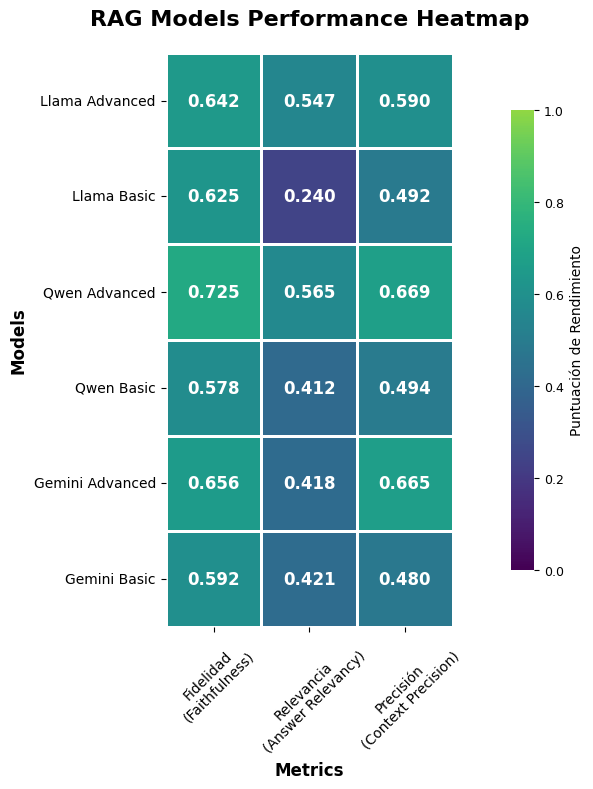

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def create_professional_heatmap():
    """Crear solo el mapa de calor profesional para RAG"""
    
    # Cargar todos los modelos
    models = {
        'Llama Advanced': pd.read_csv("resultados_csv/groq_avanzado.csv"),
        'Llama Basic': pd.read_csv("resultados_csv/groq2.csv"),
        'Qwen Advanced': pd.read_csv("resultados_csv/qwen_avanzado.csv"),
        'Qwen Basic': pd.read_csv("resultados_csv/qwen2.csv"),
        'Gemini Advanced': pd.read_csv("resultados_csv/gemini_avanzado.csv"),
        'Gemini Basic': pd.read_csv("resultados_csv/gemini2.csv")
    }
    
    metrics = ["faithfulness", "answer_relevancy", "context_precision"]
    
    # Preparar datos para el heatmap
    heatmap_data = []
    model_names = []
    
    for name, df in models.items():
        model_names.append(name)
        heatmap_data.append([df[metric].mean() for metric in metrics])
    
    # Crear DataFrame para el heatmap
    heatmap_df = pd.DataFrame(
        heatmap_data, 
        columns=['Fidelidad\n(Faithfulness)', 'Relevancia\n(Answer Relevancy)', 
                'Precisión\n(Context Precision)'],
        index=model_names
    )
    
    # Configurar el estilo
    plt.figure(figsize=(12, 8))
    plt.style.use('default')
    
    # Crear el heatmap con la paleta original
    ax = sns.heatmap(
        heatmap_df, 
        annot=True, 
        cmap='viridis', 
        center=0.6,
        square=True, 
        linewidths=2, 
        cbar_kws={
            "shrink": .8, 
            "label": "Puntuación de Rendimiento"
        },
        fmt='.3f', 
        annot_kws={
            'fontsize': 12, 
            'fontweight': 'bold',
            'color': 'white'
        },
        vmin=0, 
        vmax=1
    )
    
    # Personalizar el estilo de forma más simple
    ax.set_title('RAG Models Performance Heatmap', 
                fontsize=16, fontweight='bold', pad=20)
    
    # Etiquetas más simples
    ax.set_xlabel('Metrics', fontsize=12, fontweight='bold')
    ax.set_ylabel('Models', fontsize=12, fontweight='bold')
    
    # Rotar etiquetas para evitar solapamiento
    ax.tick_params(axis='x', rotation=45, labelsize=10)
    ax.tick_params(axis='y', rotation=0, labelsize=10)
    
    # Mejorar la barra de color
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=9)
    
    # Fondo limpio y layout
    plt.tight_layout()
    
    # IMPORTANTE: Guardar ANTES de mostrar
    plt.savefig('heatmap_rag_models.png', dpi=300, bbox_inches='tight', 
                facecolor='white', edgecolor='none')
    
    # Mostrar el gráfico DESPUÉS de guardar
    plt.show()
    
    return heatmap_df

# Crear el heatmap
heatmap_data = create_professional_heatmap()